# 1. When will we see BOE? (45pt)

## 1. (5pt) Load the data. Only keep the northern hemisphere data. Remove all missing extents–we will only work with extent below.
### Note: make sure you understand how missings are coded! There are missings in data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ice = pd.read_csv("../data/ice-extent.csv.bz2", sep="\t")
ice = ice.drop(columns=['time'], axis=1)
df = ice[ice.extent != -9999.0]
df = df[df.region == 'N']
print(df.shape)
df.head()

(517, 6)


,year,month,data-type,region,extent,area
0,1978,11,Goddard,N,11.65,9.04
2,1978,12,Goddard,N,13.67,10.90
4,1979,1,Goddard,N,15.41,12.41
6,1979,2,Goddard,N,16.18,13.18
8,1979,3,Goddard,N,16.34,13.21


## 2. (6pt) Make a plot where you show the September, December and March ice extent over years.
### Note: you may consider seaborn library in addition to matplotlib if you want ready-made functionality for data plotting. But you can also use plt.plot.

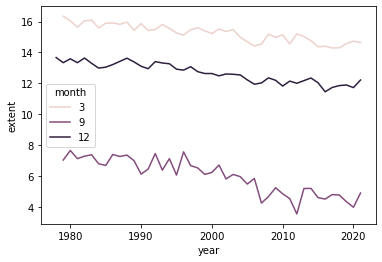

In [3]:
import seaborn as sns
months = [9,12,3]
ice_sdm = df[df['month'].isin(months)]
_ = sns.lineplot(x="year", y="extent", hue="month", data=ice_sdm)

## 3. (5pt) Estimate a linear regression model for September data where you describe the sea ice extent as a function of years.
### Note: in terms of interpeting the coefficients below, I recommend to use years relative to 2000, i.e. 1999 = −1, 2000 = 0, 2001 = 1 etc.

In [4]:
import statsmodels.formula.api as smf
ice_s = ice_sdm[ice_sdm.month == 9]
smf.ols("extent~year", data=ice_s).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           1.25e-15
Time:                        08:11:38   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.4399     12.944     13.013      0.000     142.300     194.580
year          -0.0812      0.006    -12.551      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.525
Skew:                          -0.324   Prob(JB):                        0.467
Kurtosis:                       3.656   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. (5pt) Interpret the coefficients. What does intercept mean? How big is yearly effect? Is it statistically significant? What about slope? What does it mean?

The intercept is saying that when the year is 0, the extent of ice is 168.44. The p-value is less than 0.05, so we reject the null hypothesis. This means that it is statistically significant. For every 1 year, the extent of ice decreases by .0812. This number is also the slope. 

## 5. (2pt) What does the intercept mean if
### (a) you use years as is (1999, 2000, 2001, . . . )? 
Using the years as is will be the same as above: it is saying that when the year is 0, the extent of ice is 168.44.
### (b) you use years relative to 2000 (-1, 0, 1, . . . )?

In [5]:
ice_s_relative = ice_s.copy()
ice_s_relative.year = ice_s_relative.year-2000
smf.ols("extent~year", data=ice_s_relative).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     157.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           1.25e-15
Time:                        08:11:39   Log-Likelihood:                -32.417
No. Observations:                  43   AIC:                             68.83
Df Residuals:                      41   BIC:                             72.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9935      0.080     74.629      0.000       5.831       6.156
year          -0.0812      0.006    -12.551      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.573   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.525
Skew:                          -0.324   Prob(JB):                        0.467
Kurtosis:                       3.656   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By using relative years, the intercept is 5.9935. This means that at the year 2000, the extent of is is expected to be about 5.9935.

## 6. (6pt) Create a plot (like what you did with Boston housing) where you show the regression line through the September data points. Comment the plot. Do you see a trend? Do you see any acceleration/deceleration (i.e. the trend is getting faster/slower)?

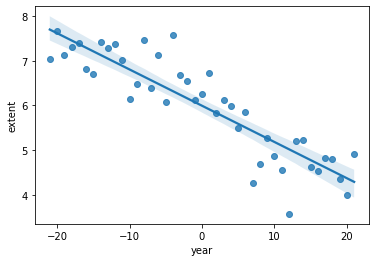

In [6]:
import seaborn as sns
_ = sns.regplot(y=ice_s_relative.extent, x=ice_s_relative.year)

There is a clear, decreasing trend line. I don't see a clear acceleration or decelration line.

## 7. (8pt) Based on your linear prediction: when will your trend line hit 0 and we will have BOE?
### Note: such predictions are highly speculative as we ignore the physical reality of the polar regions
### Note 2: Your figure tells when will the trend reach zero. The first BOE will probably happen 10-20 years earlier as the yearly extent jumps ip and down around the trend

We will hit 0 when extent=0. To calculate this, use the following formula: extent = 5.9935 + (-0.0812) * year. By reorganizing the formula, we get this: extent - 5.9935 / (-0.0812) = year

In [7]:
extent = 0
x = -0.0812
b = 5.9935 #using years relative to 2000 data
(extent - b) / x

73.81157635467981

We will have BOE at around year 74 relative to the year 2000. This means that we will have BOE at around 2074. However, as noted in Note 1, this is merely speculative, as it doesn't take into account many factors such as the physical reality of the polar regions and the social and environmental changes that might occur. In addition, Note 2 states that the first BOE will probably happen 10-20 years earlier than expected due to the extend variable often jumping around the trend line. This means that the prediction for BOE is updated to around 2054-2064.

## 8. (8pt) Repeat these calculations for March - the month of the yearly maximum. When will the Arctic be completely ice free (if current trends continue)?

In [8]:
ice_m = ice_sdm[ice_sdm.month == 3]
ice_m_relative = ice_m.copy()
ice_m_relative.year = ice_m_relative.year-2000
smf.ols("extent~year", data=ice_m_relative).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           8.96e-16
Time:                        08:11:43   Log-Likelihood:                -1.3365
No. Observations:                  43   AIC:                             6.673
Df Residuals:                      41   BIC:                             10.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2570      0.039    391.380      0.000      15.178      15.336
year          -0.0398      0.003    -12.679      0.000      -0.046      -0.033
==============================================================================
Omnibus:                        3.903   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.534
Skew:                          -0.403   Prob(JB):                        0.282
Kurtosis:                       2.125   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
extent = 0
x = -0.0398
b = 15.2570 #using years relative to 2000 data
(extent - b) / x

383.34170854271355

By using the calculations for March, the Arctic will be completely ice free by around 2383. Again, by taking into account Note 2, a closer prediction would be between the years 2363-2373.

# 2. How is Basketball Game Score Calculated? (45pt)

## 1. (2pt) Load the data (harden-18-19.csv). Do basic sanity checks.

In [10]:
harden = pd.read_csv("../data/harden-18-19.csv.bz2")
print(harden.shape)
harden.head()

(82, 30)


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


## 2. (2pt) How many games did James Harden play in the 2018-2019 season?
### Note: the data also includes games where he did not play

In [11]:
harden = harden.dropna(subset=['G']) #filtered out the games (G) in the dataset where the value was NaN

In [12]:
harden.shape[0]

78

## 3. (4pt) Clean the data and ensure that the relevant variables are of numeric type so we can use those in regression models. It is your task to find what is wrong with the data in its present form (it is downloaded directly from basketball-reference.com), and fix these issues.
### Hint: a good way to transform text to number is pd.to_numeric

In [13]:
harden.GmSc = pd.to_numeric(harden.GmSc)
harden.FGA = pd.to_numeric(harden.FGA)
harden.FG = pd.to_numeric(harden.FG)

harden.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
7,8,5.0,2018-11-03,29-069,HOU,@,CHI,W (+8),1,33:16,...,1,1,7,4,0,8,3,25,15.1,+9


## 4. (5pt) Analyze the game score GmSc. What is its distribution? Which distribution does the histogram resemble? Range? Mean? Standard deviation?

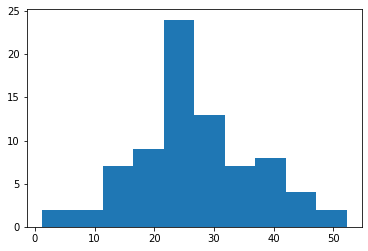

In [14]:
_ = plt.hist(harden.GmSc)

It looks normally distributed, but it doesn't really look symmetric. There are no skews, but the peak of the histogram is so much greater than the other values.

In [15]:
print("Mean: ", harden.GmSc.mean())
print("Range: ", harden.GmSc.max() - harden.GmSc.min())
print("Standard Deviation: ", harden.GmSc.std())

Mean:  26.708974358974366
Range:  51.0
Standard Deviation:  10.053883218218113


## 5. (6pt) First, lets run a simple regression model explaining game score GmSc by field goal attempts FGA: 
## $GmScg = \beta_0 + \beta_1 * FGA_g + \epsilon_g$, where g indexes games. (Call this Model 5)

In [16]:
smf.ols("GmSc~FGA", data=harden).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           0.000433
Time:                        08:11:50   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5963      4.240      2.735      0.008       3.152      20.041
FGA            0.6175      0.168      3.680      0.000       0.283       0.952
==============================================================================
Omnibus:                        0.602   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.739
Skew:                          -0.137   Prob(JB):                        0.691
Kurtosis:                       2.609   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### a. What is the interpretation of Intercept ($B0$)?
The intercept is saying that even when Harden does not have any Field Goal Attempts, he is still expected to get about 12 points (rounded).
### b. What is the interpretation of FGA ($B1$)? Is it statistically significant?
For each Field Goal Attempted, the game score increases by 0.6175. However, this is not possible in this scenario because a field goal basket is worth 2 or 3 points, depending on where the player shoots from. So, the player would to do atleast 4 FGA in order to get points towards the game score. 

This is statistically significant because the p-value is less than 0.05, which is the significance level. In addition, the null hypothesis ($H0$ = 0) is not in the confidence interval. With this, we can reject $H0$, making the test statistically significant

## 6. (12pt) Next, lets analyse how is game score (GmSc) related to field goals (FG) and field goal attempts (FGA). Estimate the model: GmScg = $\beta_0 + \beta_1 * FG_g + \beta_2 * FGA_g + \epsilon_g$ (Call this Model 6). If done correctly, you should see results approximately 6.9, 3.4, -0.7. Answer the following questions:

In [109]:
smf.ols("GmSc~FG + FGA", data=harden).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           1.33e-14
Time:                        06:05:50   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8608      3.075      2.231      0.029       0.735      12.987
FG             3.4082      0.396      8.616      0.000       2.620       4.196
FGA           -0.6940      0.194     -3.584      0.001      -1.080      -0.308
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.904
Skew:                           0.154   Prob(JB):                        0.386
Kurtosis:                       2.299   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (a) What is the interpretation of $FG$? Is it statistically significant?

For each field goals scored, the game score increases by around 3 points (rounded). With $H0$: FG=0, it is not in the confidence interval of [2.620, 4.196], meaning we can reject $H0$. In addition, the p-value is less than the significant level of 0.05, and the t-value is fairly large and is above the tcritical value, meaning we further reject the $H0$ (t-crit is found in the following pdf: https://yuppal.people.ysu.edu/econ_3790/t-table.pdf). This is statistically significant. 

### (b) What is the interpretation of $FGA$ ($\beta 2$)? Is it statistically significant?

Each time Harden attempts a field goal, the game score decreases by 0.6940 if the field goals (FG) remains the same. This is statistically significant because $H0$: $FGA$ = 0. $H0$ is not in the confidence interval, its p-value is less than the significance level of 0.05, and the t-value is larger than the t-critical. However, this doesn't seem to make any sense, since it is not possible to earn negative points in basketball. Specifically, it makes no sense that Harden would lose 0.69 points for every time he made a field goal attempt

## (c) How do you explain the fact that model 5 shows positive and model 6 shows a negative estimate for FGA? There is a very easy an intuitive explanation that everyone will understand. Can you figure out what it is?
In model 5, it is only taking into account Field Goal Attempt (FGA) and the Game Score (GmSc). It would make sense for FGA to have a positive coefficient because we are not taking into account anything else. However, in model 6, we are taking into account both Field Goal (FG) and FGA. If FG remains the same and FGA increases, then that means that the Harden missed his FGs. 


## (d) What is the R2 of the model? How does it compare to the model 5? What do you conclude from this comparison?

Model 5 $R^2$: 0.151

Model 6 $R^2$: 0.572

The $R^2$ value is larger on Model 6 than it is for Model 5. Model 6 explains about 57% of the variation in the data. I think that it is safe to say that the the multiple regression model is able to explain the GmSc result better than the single regression model.

## 7. (9pt) Now include all the independent numerical variables, i.e. FG, FGA, 3P, 3PA, FT, FTA, ORB, DRB, AST, STL, BLK, TOV, PF into the model. Estimate it, and discuss the results. Answer the following questions:

In [88]:
cols = ['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
harden[cols] = harden[cols].apply(pd.to_numeric, errors='coerce')
harden.head()

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
7,8,5.0,2018-11-03,29-069,HOU,@,CHI,W (+8),1,33:16,...,1,1,7,4,0,8,3,25,15.1,+9


In [90]:
harden.rename(columns={'3P':'ThrPoint', '3PA':'ThrPointA' }, inplace=True)
smf.ols("GmSc ~ FG + FGA + ThrPoint + ThrPointA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF + PTS", data=harden).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.407e+28
Date:                Wed, 16 Feb 2022   Prob (F-statistic):               0.00
Time:                        04:53:43   Log-Likelihood:                 2249.5
No. Observations:                  78   AIC:                            -4471.
Df Residuals:                      64   BIC:                            -4438.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.421e-14   5.65e-14      0.251      0.802   -9.87e-14    1.27e-13
FG             0.3429   5.72e-15   5.99e+13      0.000       0.343       0.343
FGA           -0.7000   3.96e-15  -1.77e+14      0.000      -0.700      -0.700
ThrPoint      -0.0286   7.87e-15  -3.63e+12      0.000      -0.029      -0.029
ThrPointA   2.442e-15   5.16e-15      0.473      0.638   -7.86e-15    1.27e-14
FT             0.3714   7.97e-15   4.66e+13      0.000       0.371       0.371
FTA           -0.4000   8.14e-15  -4.91e+13      0.000      -0.400      -0.400
ORB            0.7000   1.05e-14   6.64e+13      0.000       0.700       0.700
DRB            0.3000   3.95e-15   7.59e+13      0.000       0.300       0.300
AST            0.7000   2.95e-15   2.38e+14      0.000       0.700       0.700
STL            1.0000   6.72e-15   1.49e+14      0.000       1.000       1.000
BLK            0.7000   1.22e-14   5.71e+13      0.000       0.700       0.700
TOV           -1.0000   4.98e-15  -2.01e+14      0.000      -1.000      -1.000
PF            -0.4000   7.56e-15  -5.29e+13      0.000      -0.400      -0.400
PTS            1.0286   1.88e-15   5.48e+14      0.000       1.029       1.029
==============================================================================
Omnibus:                        0.516   Durbin-Watson:                   0.070
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.652
Skew:                          -0.074   Prob(JB):                        0.722
Kurtosis:                       2.577   Cond. No.                     4.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.3e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### (a) How do standard errors and t-values look like in this model?

The t-value is very big, and the standard error is very small/

### (b) What is $R^2$ of this model? What does it tell you about how game score is calculated?

The $R^2$ of this model is 1. This means that 100% of the variation in the data set can be explained by the variables above. The plot perfectly matches the regression line. The score of the game is dependent on the variables above.

### (c) What do the results tell about turnover (TOV)? Is it good or bad for the team?

With all things being equal, for each turnover, the team loses 1 point. This is bad for the team.

## 8. (5pt)  Finally, consult the game score explanation at https://www.nbastuffer.com/analytics101/game-score/. Did you recover the same formula?

Game Score Formula=(Points)+0.4*(Field Goals Made)+0.7*(Offensive Rebounds)+0.3*(Defensive rebounds)+(Steals)+0.7*(Assists)+0.7*(Blocked Shots)- 0.7*(Field Goal Attempts)-0.4*(Free Throws Missed) – 0.4*(Personal Fouls)-(Turnovers)

|Variable| My results |  NBA  |
| :----: | :--------: |:-----:|
| Points |   1.0286   |   1   |
|   FG   |   0.3429   |  0.4  | 
|   FGA  |    -.7     |  -.7  |
|   3PT  |   -.0286   |   --  |
|  3PTA  |      0     |   --  |
|   FT   |    .3714   |   --  |
|   FTA  |     -.4    |  -.4  |
|   ORB  |     .7     |   .7  |
|   DRB  |     .3     |   .3  |
|   AST  |     .7     |   .7  |
|   STL  |      1     |   1   |
|   BLK  |     .7     |   .7  |
|   TOV  |     -1     |   -1  |
|   PF   |     -.4    |  -.4  |

The results I got from my regression model was very close to the ones in the link. All of the coefficients were either exactly the same, or very close to the ones in the link. However, the variables $3PT, 3PTA, FT$ weren't in the formula.

# 3. Interpret regression results in the literature (10pt)

## 1. (3pt) Do those who have a partner have better mental health (as measured by PHQ-9)? Is the effect statistically significant?
With other things being equal, those who have a partner seem to have better mental health than those who don't. For this interpretation, it is best to think the smaller the coefficient, the better. This test is not statistically significant because the p-value (.150) is bigger than the significant level of 0.05.

## 2. (4pt) What is the effect of COVID exposure? Is it improving or worsening mental health? Is the effect statistically significant?
With other things being equal, the COVID exposure has resulted in worst mental health. As with the above question, the p-value of .129 is bigger than the significant level of 0.05, so this test is not statistically significant.

## 3. (3pt) How is Financial distress related to mental health? Is the effect statistically significant?
With other things being equal, financial distress has caused worsening of mental health. It is one of the largest positive numbers. This is statistically significant because the p-value associated with this variable is <.001, which is less than the significant value, meaning we can reject $H0$

# Finally tell us how many hours did you spend on this PS.
Around 6 hours